In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from datetime import datetime
from keystroke_module import *
from torch import nn

In [ ]:
# TO DO: kontrola bledow np. w konstruktorze klasy -?
# zalozenie minimalnej dlugosci: 100 czy 150? (bo wynika ze w ciagu 6min z 1.datasetu najmniej to 107 i 117 po filtracji, reszta co najmniej 150 kikniec, srednio na osobe wychodzi 600)

## Read data - (1. dataset)

d:\studia_mgrEIM\master_diploma\repo\masterdiploma\keystroke_module.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1.drop(columns=['file_2'], inplace=True)


Patients with PD:  60
Patients without PD:  56


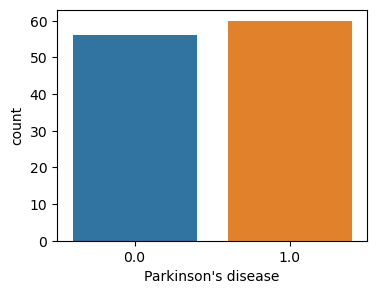

In [2]:
filename1 = 'D:/studia_mgrEIM/master_diploma/data/neuroqwerty/MIT-CS1PD/GT_DataPD_MIT-CS1PD.csv'
filename2 = 'D:/studia_mgrEIM/master_diploma/data/neuroqwerty/MIT-CS2PD/GT_DataPD_MIT-CS2PD.csv'
path = 'D:/studia_mgrEIM/master_diploma/data/neuroqwerty/all/'

data1 = nqDataset(filename1, filename2)
data1.show_stats()

In [10]:
data1.prepare_dataset(path, feature_extract=2)
print(data1.features.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
(116, 22)


In [12]:
# tests
a = np.count_nonzero(np.isnan(data1.features))
print(a)
col_mean = np.nanmean(data1.features, axis=0)

inds = np.where(np.isnan(data1.features))
data1.features[inds] = np.take(col_mean, inds[1])
b = np.count_nonzero(np.isnan(data1.features))
print(b)

2
0


In [7]:
('  KNN')
cross_validation(data1.features, data1.ground_truth, train_func=train_kNN_model)

Number of fold:  1
{'0.0': {'precision': 0.5625, 'recall': 0.9, 'f1-score': 0.6923076923076923, 'support': 10}, '1.0': {'precision': 0.875, 'recall': 0.5, 'f1-score': 0.6363636363636364, 'support': 14}, 'accuracy': 0.6666666666666666, 'macro avg': {'precision': 0.71875, 'recall': 0.7, 'f1-score': 0.6643356643356644, 'support': 24}, 'weighted avg': {'precision': 0.7447916666666666, 'recall': 0.6666666666666666, 'f1-score': 0.6596736596736597, 'support': 24}}
Number of fold:  2
{'0.0': {'precision': 0.4, 'recall': 0.6666666666666666, 'f1-score': 0.5, 'support': 6}, '1.0': {'precision': 0.8461538461538461, 'recall': 0.6470588235294118, 'f1-score': 0.7333333333333334, 'support': 17}, 'accuracy': 0.6521739130434783, 'macro avg': {'precision': 0.6230769230769231, 'recall': 0.6568627450980392, 'f1-score': 0.6166666666666667, 'support': 23}, 'weighted avg': {'precision': 0.7297658862876254, 'recall': 0.6521739130434783, 'f1-score': 0.6724637681159421, 'support': 23}}
Number of fold:  3
{'0.0':

In [13]:
('  KNN')
cross_validation(data1.features, data1.ground_truth, train_func=train_kNN_model)

Number of fold:  1
{'0.0': {'precision': 0.5833333333333334, 'recall': 0.7, 'f1-score': 0.6363636363636365, 'support': 10}, '1.0': {'precision': 0.75, 'recall': 0.6428571428571429, 'f1-score': 0.6923076923076924, 'support': 14}, 'accuracy': 0.6666666666666666, 'macro avg': {'precision': 0.6666666666666667, 'recall': 0.6714285714285715, 'f1-score': 0.6643356643356644, 'support': 24}, 'weighted avg': {'precision': 0.6805555555555557, 'recall': 0.6666666666666666, 'f1-score': 0.6689976689976692, 'support': 24}}
Number of fold:  2
{'0.0': {'precision': 0.7142857142857143, 'recall': 0.3333333333333333, 'f1-score': 0.4545454545454545, 'support': 15}, '1.0': {'precision': 0.375, 'recall': 0.75, 'f1-score': 0.5, 'support': 8}, 'accuracy': 0.4782608695652174, 'macro avg': {'precision': 0.5446428571428572, 'recall': 0.5416666666666666, 'f1-score': 0.47727272727272724, 'support': 23}, 'weighted avg': {'precision': 0.5962732919254659, 'recall': 0.4782608695652174, 'f1-score': 0.4703557312252964, '

In [8]:
('  SVM')
cross_validation(data1.features, data1.ground_truth, train_func=train_SVM_model)

Number of fold:  1
{'0.0': {'precision': 0.6428571428571429, 'recall': 0.9, 'f1-score': 0.75, 'support': 10}, '1.0': {'precision': 0.9, 'recall': 0.6428571428571429, 'f1-score': 0.75, 'support': 14}, 'accuracy': 0.75, 'macro avg': {'precision': 0.7714285714285715, 'recall': 0.7714285714285715, 'f1-score': 0.75, 'support': 24}, 'weighted avg': {'precision': 0.7928571428571428, 'recall': 0.75, 'f1-score': 0.75, 'support': 24}}
Number of fold:  2
{'0.0': {'precision': 0.7272727272727273, 'recall': 0.8, 'f1-score': 0.761904761904762, 'support': 10}, '1.0': {'precision': 0.8333333333333334, 'recall': 0.7692307692307693, 'f1-score': 0.8, 'support': 13}, 'accuracy': 0.782608695652174, 'macro avg': {'precision': 0.7803030303030303, 'recall': 0.7846153846153847, 'f1-score': 0.7809523809523811, 'support': 23}, 'weighted avg': {'precision': 0.7872200263504613, 'recall': 0.782608695652174, 'f1-score': 0.7834368530020704, 'support': 23}}
Number of fold:  3
{'0.0': {'precision': 0.7272727272727273, 

In [20]:
('  SVM')
cross_validation(data1.features, data1.ground_truth, train_func=train_SVM_model)

Number of fold:  1
{'0.0': {'precision': 0.6153846153846154, 'recall': 1.0, 'f1-score': 0.761904761904762, 'support': 8}, '1.0': {'precision': 1.0, 'recall': 0.6875, 'f1-score': 0.8148148148148148, 'support': 16}, 'accuracy': 0.7916666666666666, 'macro avg': {'precision': 0.8076923076923077, 'recall': 0.84375, 'f1-score': 0.7883597883597884, 'support': 24}, 'weighted avg': {'precision': 0.8717948717948718, 'recall': 0.7916666666666666, 'f1-score': 0.7971781305114639, 'support': 24}}
Number of fold:  2
{'0.0': {'precision': 0.6666666666666666, 'recall': 0.46153846153846156, 'f1-score': 0.5454545454545455, 'support': 13}, '1.0': {'precision': 0.5, 'recall': 0.7, 'f1-score': 0.5833333333333334, 'support': 10}, 'accuracy': 0.5652173913043478, 'macro avg': {'precision': 0.5833333333333333, 'recall': 0.5807692307692307, 'f1-score': 0.5643939393939394, 'support': 23}, 'weighted avg': {'precision': 0.5942028985507246, 'recall': 0.5652173913043478, 'f1-score': 0.5619235836627141, 'support': 23}

In [9]:
('  MLP')
cross_validation(data1.features, data1.ground_truth, train_func=train_MLP_model)

Number of fold:  1


d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


{'0.0': {'precision': 0.7142857142857143, 'recall': 0.8333333333333334, 'f1-score': 0.7692307692307692, 'support': 12}, '1.0': {'precision': 0.8, 'recall': 0.6666666666666666, 'f1-score': 0.7272727272727272, 'support': 12}, 'accuracy': 0.75, 'macro avg': {'precision': 0.7571428571428571, 'recall': 0.75, 'f1-score': 0.7482517482517481, 'support': 24}, 'weighted avg': {'precision': 0.7571428571428571, 'recall': 0.75, 'f1-score': 0.7482517482517482, 'support': 24}}
Number of fold:  2
{'0.0': {'precision': 0.5833333333333334, 'recall': 0.5833333333333334, 'f1-score': 0.5833333333333334, 'support': 12}, '1.0': {'precision': 0.5454545454545454, 'recall': 0.5454545454545454, 'f1-score': 0.5454545454545454, 'support': 11}, 'accuracy': 0.5652173913043478, 'macro avg': {'precision': 0.5643939393939394, 'recall': 0.5643939393939394, 'f1-score': 0.5643939393939394, 'support': 23}, 'weighted avg': {'precision': 0.5652173913043478, 'recall': 0.5652173913043478, 'f1-score': 0.5652173913043478, 'suppo

d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [21]:
('  MLP')
cross_validation(data1.features, data1.ground_truth, train_func=train_MLP_model)

Number of fold:  1


d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr

{'0.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 12}, '1.0': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 12}, 'accuracy': 0.5, 'macro avg': {'precision': 0.25, 'recall': 0.5, 'f1-score': 0.3333333333333333, 'support': 24}, 'weighted avg': {'precision': 0.25, 'recall': 0.5, 'f1-score': 0.3333333333333333, 'support': 24}}
Number of fold:  2
{'0.0': {'precision': 0.6521739130434783, 'recall': 1.0, 'f1-score': 0.7894736842105263, 'support': 15}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 8}, 'accuracy': 0.6521739130434783, 'macro avg': {'precision': 0.32608695652173914, 'recall': 0.5, 'f1-score': 0.39473684210526316, 'support': 23}, 'weighted avg': {'precision': 0.42533081285444235, 'recall': 0.6521739130434783, 'f1-score': 0.5148741418764302, 'support': 23}}
Number of fold:  3


d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr

{'0.0': {'precision': 0.391304347826087, 'recall': 1.0, 'f1-score': 0.5625, 'support': 9}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 14}, 'accuracy': 0.391304347826087, 'macro avg': {'precision': 0.1956521739130435, 'recall': 0.5, 'f1-score': 0.28125, 'support': 23}, 'weighted avg': {'precision': 0.15311909262759923, 'recall': 0.391304347826087, 'f1-score': 0.22010869565217392, 'support': 23}}
Number of fold:  4
{'0.0': {'precision': 0.34782608695652173, 'recall': 1.0, 'f1-score': 0.5161290322580645, 'support': 8}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 15}, 'accuracy': 0.34782608695652173, 'macro avg': {'precision': 0.17391304347826086, 'recall': 0.5, 'f1-score': 0.25806451612903225, 'support': 23}, 'weighted avg': {'precision': 0.12098298676748583, 'recall': 0.34782608695652173, 'f1-score': 0.17952314165497896, 'support': 23}}
Number of fold:  5


d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'0.0': {'precision': 0.5217391304347826, 'recall': 1.0, 'f1-score': 0.6857142857142856, 'support': 12}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 11}, 'accuracy': 0.5217391304347826, 'macro avg': {'precision': 0.2608695652173913, 'recall': 0.5, 'f1-score': 0.3428571428571428, 'support': 23}, 'weighted avg': {'precision': 0.2722117202268431, 'recall': 0.5217391304347826, 'f1-score': 0.35776397515527947, 'support': 23}}
Cross Validation Accuracy Scores:  [0.5, 0.65, 0.39, 0.35, 0.52]
Average CV Score:  0.48200000000000004


d:\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no pr

## Read data - (2. dataset TAPPY)

In [ ]:
# TO DO: sztuczne powiększenie zbioru grupy kontrolnej w Tappy ?
# how many files? - this number of records

Patients with PD:  162
Patients without PD:  55


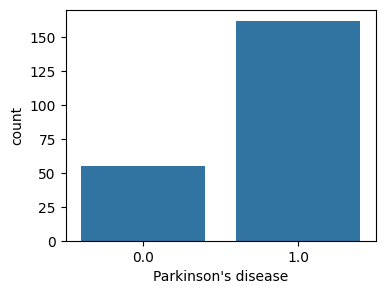

In [2]:
directory_path1 = 'D:/studia_mgrEIM/master_diploma/data/tappy-keystroke-data-1.0.0/Archived_users/'
directory_path2 = 'D:/studia_mgrEIM/master_diploma/data/tappy-keystroke-data-1.0.0/Tappy_Data/'

data2 = tappyDataset(directory_path1, directory_path2, opt=0)
data2.show_stats()

In [3]:
data2.user_info.tail()

,pID,files,Parkinsons
222,ZT9ASWFCFS,[ZT9ASWFCFS_1606.txt],1.0
223,ZWBPPNQCUX,"[ZWBPPNQCUX_1608.txt, ZWBPPNQCUX_1612.txt]",1.0
224,ZWHGXDUDLG,[ZWHGXDUDLG_1703.txt],1.0
225,ZY9CCHSPF2,"[ZY9CCHSPF2_1607.txt, ZY9CCHSPF2_1608.txt, ZY9...",1.0
226,ZYWLN4JVLA,[ZYWLN4JVLA_1701.txt],1.0


In [3]:
data2.prepare_dataset(directory_path2, feature_extract=2)
# print(data2.trainset.shape)


Index:  0
L:  2


d:\studia_mgrEIM\master_diploma\repo\masterdiploma\keystroke_module.py:478: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, delimiter="\t", index_col=False, header=None, names=[


used

Index:  1
L:  2
used

Index:  2
L:  1
Record not useful, with gt:  0.0
Counter:  0

Index:  3
L:  1
Record not useful, with gt:  0.0
Counter:  0

Index:  4
L:  2
used

Index:  5
L:  1
Warning was raised as an exception!
Warning was raised as an exception!
Record not useful, with gt:  1.0
Counter:  0

Index:  6
L:  2
used

Index:  7
L:  2
used

Index:  8
L:  2
Warning was raised as an exception!
Warning was raised as an exception!
Record not useful, with gt:  0.0
Counter:  1

Index:  9
L:  6
used

Index:  10
L:  2
used

Index:  11
L:  1
used

Index:  12
L:  1
Record not useful, with gt:  0.0
Counter:  0

Index:  13
L:  4
used

Index:  14
L:  2
used

Index:  15
L:  1
used

Index:  16
L:  2
used

Index:  17
L:  2
used

Index:  18
L:  1
used

Index:  19
L:  8
used

Index:  20
L:  1
Warning was raised as an exception!
Warning was raised as an exception!
Record not useful, with gt:  1.0
Counter:  0

Index:  21
L:  1
Warning was raised as an exception!
Warning was raised as an exception

d:\studia_mgrEIM\master_diploma\repo\masterdiploma\keystroke_module.py:478: DtypeWarning: Columns (4,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filename, delimiter="\t", index_col=False, header=None, names=[


used

Index:  76
L:  7
Warning was raised as an exception!
Warning was raised as an exception!
Record not useful, with gt:  0.0
Counter:  6

Index:  77
L:  3
used

Index:  78
L:  1
Record not useful, with gt:  1.0
Counter:  0

Index:  79
L:  1
Warning was raised as an exception!
Warning was raised as an exception!
Record not useful, with gt:  0.0
Counter:  0

Index:  80
L:  2
used

Index:  81
L:  1
used

Index:  82
L:  7
used

Index:  83
L:  1
Record not useful, with gt:  1.0
Counter:  0

Index:  84
L:  1
Record not useful, with gt:  0.0
Counter:  0

Index:  85
L:  1
used

Index:  86
L:  2
used

Index:  87
L:  1
Record not useful, with gt:  1.0
Counter:  0

Index:  88
L:  1
Warning was raised as an exception!
Warning was raised as an exception!
Record not useful, with gt:  1.0
Counter:  0

Index:  89
L:  1
Warning was raised as an exception!
Warning was raised as an exception!
Record not useful, with gt:  0.0
Counter:  0

Index:  90
L:  1
used

Index:  91
L:  1
used

Index:  92
L:  8
u

In [5]:
print(data2.features.shape)
signiX = data2.features
signiY = data2.user_info['Parkinsons'].to_numpy()

(168, 22)


In [12]:
np.save('data_features.npy', data2.features)
np.save('data_gt.npy', data2.user_info['Parkinsons'].to_numpy())

In [2]:
signiX = np.load('data_features.npy')
signiY = np.load('data_gt.npy')

In [3]:
X_train, X_test, y_train, y_test = train_test_split(signiX, signiY, test_size=0.3, random_state=2)
trainer = train_architecture(X_train,y_train,seed=40,max_epoch_train = 50)

Global seed set to 40
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name      | Type           | Params
---------------------------------------------
0 | layers    | Sequential     | 1.3 K 
1 | ce        | BCELoss        | 0     
2 | train_acc | BinaryAccuracy | 0     
3 | test_acc  | BinaryAccuracy | 0     
---------------------------------------------
1.3 K     Trainable params
0         Non-trainable params
1.3 K     Total params
0.005     Total estimated model params size (MB)
d:\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=50` reached.


In [4]:
test_architecture(trainer,X_test, y_test)

d:\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\checkpoint_connector.py:124: UserWarning: `.test(ckpt_path=None)` was called without a model. The best model of the previous `fit` call will be used. You can pass `.test(ckpt_path='best')` to use the best model or `.test(ckpt_path='last')` to use the last model. If you pass a value, this warning will be silenced.
  rank_zero_warn(
Restoring states from the checkpoint path at d:\studia_mgrEIM\master_diploma\repo\masterdiploma\lightning_logs\version_0\checkpoints\epoch=49-step=5850.ckpt


Loaded model weights from checkpoint at d:\studia_mgrEIM\master_diploma\repo\masterdiploma\lightning_logs\version_0\checkpoints\epoch=49-step=5850.ckpt
d:\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:488: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(
d:\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7493432760238647
        test_loss           0.5883905291557312
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


In [12]:
# https://github.com/Lightning-AI/lightning/issues/924
model_test = MLP.load_from_checkpoint('lightning_logs/version_15/checkpoints/epoch=39-step=6720.ckpt')
trainer = pl.Trainer()  
trainer.test(model_test,dataloaders=test_dataloader)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
d:\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:488: PossibleUserWarning: Your `test_dataloader`'s sampler has shuffling enabled, it is strongly recommended that you turn shuffling off for val/test/predict dataloaders.
  rank_zero_warn(
d:\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 4 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.6817317008972168
        test_loss           0.5722163319587708
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


[{'test_loss': 0.5722163319587708, 'test_acc': 0.6817317008972168}]

In [36]:
def sampling_imbalanced_data(X, y, opt='under'):
    if str(opt) == 'under':
        rus = RandomUnderSampler(random_state=None)
        X_resampl, y_resampl = rus.fit_resample(X, y)
    else:
        ros = RandomOverSampler(random_state=None)
        X_resampl, y_resampl = ros.fit_resample(X, y)
    return X_resampl, y_resampl
    

X_resampl, y_resampl = sampling_imbalanced_data(signiX, signiY, opt='under')
trainset, testset, train_ground_truth, test_ground_truth = train_test_split(
    X_resampl, y_resampl, test_size=0.3, shuffle=True, random_state=42)
    # signiX, signiY, test_size=0.3, shuffle=True, random_state=42)

('  KNN')
model = train_kNN_model(trainset, train_ground_truth)
predictions, acc_val, rep = test_selected_model(testset, test_ground_truth, model)

('  SVM')
model = train_SVM_model(trainset, train_ground_truth)
predictions, acc_val, rep = test_selected_model(testset, test_ground_truth, model)

0.3076923076923077
              precision    recall  f1-score   support

         0.0       0.29      0.33      0.31        12
         1.0       0.33      0.29      0.31        14

    accuracy                           0.31        26
   macro avg       0.31      0.31      0.31        26
weighted avg       0.31      0.31      0.31        26

0.4230769230769231
              precision    recall  f1-score   support

         0.0       0.42      0.67      0.52        12
         1.0       0.43      0.21      0.29        14

    accuracy                           0.42        26
   macro avg       0.42      0.44      0.40        26
weighted avg       0.43      0.42      0.39        26

